# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Bhagwanji Verma

# **Project Summary -**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/Bhagwanjiv/Final_Draft_Retail_Sales_Prediction_Submission_Bhagwanji_Verma

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})


###Mount the Drive and Import the Dataset

In [ ]:
# Mount the Google Drive for Import the Dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
sales_data =pd.read_csv("/content/drive/MyDrive/Katdrive/Rossmann Stores Data.csv")

store_data=pd.read_csv("/content/drive/MyDrive/Katdrive/store.csv")

In [ ]:
sales_data.head() #first look at sales data

In [ ]:
store_data.head() # First look at store data

In [ ]:
df=sales_data.merge(store_data, how='outer', on='Store') #Merge Both dataframes

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
df.shape # check the shape of the data after merging the sales and store data

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

The given dataset is a dataset from Rossmen industry who operates over 3,000 drug stores in 7 European countries, and we have to analysis the sales of the stores and whatbare the factores affecting the sales.
in our given dataset has 1017209 rows and 18 columnn and There are some missing values and there is no duplicate values in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

In [ ]:
df.Date

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day.
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open.
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 0->No holidays and a,b,c->Different types holidays.
7. SchoolHoliday - Indicates whether school was open or closed(0-Open,1-Closed).
8. StoreType - differentiates between 4 different store models: a, b, c, d
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
10. CompetitionDistance - distance in meters to the nearest competitor store
11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
12. Promo - indicates whether a store is running a promo on that day
13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',df[col].unique())

In [ ]:
df.Promo2.unique()

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
print(df['StateHoliday'].unique())
print(" ")
# Getting Unique StateHoliday Count
print("Unique StateHoliday Count is ",df['StateHoliday'].nunique())

In the above output, 'StateHoliday' contains two types of zeros. One is object type and other one is int type. So, we need to change the dtype of zero which is in incorrect data type.

In [ ]:
# In StateHloday column, there is a string "0" so, convert it into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
df.StateHoliday.unique()

In [ ]:
print(df['PromoInterval'].unique())
print(" ")
# Getting Unique PromoInterval Count
print("Unique StateHoliday Count is ",df['PromoInterval'].nunique())

In [ ]:
# Getting Unique Store types
print(df['StoreType'].unique())
print(" ")
# Getting Unique States Count
print("Unique States Count is ",df['StoreType'].nunique(),".")

In [ ]:
# assigning as a categorical variables
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
# Convert the 'Date' column to a datetime data type, specifying the date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract the year, month, and day from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

Hence, our dataframe contains object data type, so we converted it into datetime as shown above.

In [ ]:
#Here we are checking average sale of each type of store
print(df[df['StoreType'] == 'a']['Sales'].mean())
print(df[df['StoreType'] == 'b']['Sales'].mean())
print(df[df['StoreType'] == 'c']['Sales'].mean())
print(df[df['StoreType'] == 'd']['Sales'].mean())

In [ ]:
#Counts of Store of Each Type
df.StoreType.value_counts()

In [ ]:
#Extracting day from date and time
df["Day"] = df['Date'].dt.day_name()

In [ ]:
#Extracting Months from date and time
df["Months"] = df["Date"].dt.month_name()

In [ ]:
#checking sale on weekend
weekend_sale = df.groupby(['StoreType','Day'])['Sales'].mean().reset_index()
weekend_sale.rename(columns={'Sales': 'Mean Sales on Day'}, inplace=True)
weekend_sale

In [ ]:
#checking Sale on each months try to find sale on summer vocation
monthly_sale = df.groupby(['Months'])['Sales'].mean().sort_values()
monthly_sale

In [ ]:
df.drop(['Months','Day'], axis=1, inplace=True)

In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type.rename(columns={'Sales': 'Total Sale'}, inplace=True)
store_type.rename(columns={'Customers': 'Total Customers'}, inplace=True)
store_type

In [ ]:
store_open = df.groupby("StoreType")["Open","StateHoliday","SchoolHoliday"].sum().reset_index()
store_open

In [ ]:
store_assortment = df.groupby(['StoreType'])['Promo','Promo2'].count().reset_index()
store_assortment

In [ ]:
df.columns

In [ ]:
sales_in_each_assortemt =df.groupby(['StoreType','Assortment'])['Sales'].sum().reset_index()
sales_in_each_assortemt

In [ ]:
#just looking at the daily sales numbers over time.
sales_date = df.groupby(by='Date').agg({'Sales': 'sum'}).reset_index()
sales_date

In [ ]:
df.PromoInterval.values

In [ ]:
#here obtaining average sales over months and years.
df.groupby(['year','month'])['Sales'].mean()


In [ ]:
# here exploring store types along with assortment , state holiday and avg sales
df.groupby(['StoreType','Assortment','StateHoliday'])['Sales'].mean()

### What all manipulations have you done and insights you found?

We delved into the data, scrutinizing every variable and discovered a relationship between sales (the target variable) and the independent (or predictor) variables. We found four distinct store types, with type-a being the most abundant and type-b the least. Further examination revealed that, despite having fewer stores, type-b boasted the highest average sales.

However, when looking at overall sales, type *a* came out on top. An analysis of customers by store type showed that type *a* leads the pack, indicating a higher number of visits to these stores.


We were a little curious as to why the sales of Store a are so high?

We investigated it further and found out that type *a* stores are the most and they have more customers.
When looking at store Assortment, we found out that stores types *b* has lowest Assortment and store type *a* has highest assortments, and also type *b* assortments represent a small share of total sales, as shown below.

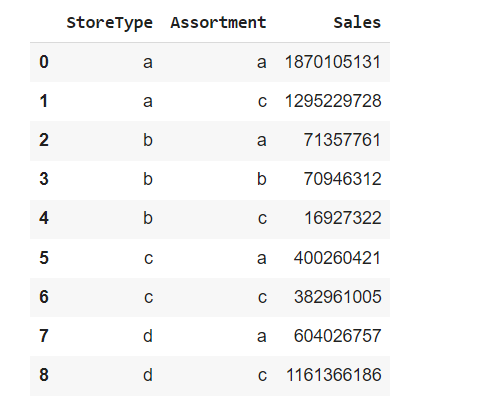

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Chart on Independant Variable i.e., Assortment (Univariate)

In [ ]:
# Chart - 1 visualization code
# Indepnedent Column (Assorment) Value Counts
print(df.Assortment.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Assortment'].value_counts().plot.pie(title='Percentage of stores having Assortment levels', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

We chose the pie chart for its ability to simplify even the most complex data by breaking it down into smaller parts represented by slices. This makes it easier to understand. Additionally, the pie chart is best suited to showcase categorical features.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can get the following insights.

1.   52.8 % stores have a:basic type assortment strategy
2.   46.3 % stores have c:Extented type assortment strategy
3.   0.8 % stores have  b:Extra type assortment strategy.
Here, we can see that maximum number of stores have basic or Extended type assortment strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

An Assortment strategy in retailing involves determining the number and type of products displayed for purchase by consumers in a store. The basic (a) and extended (c) assortment strategies are seeing positive growth, as most stores applying these strategies experience positive sales growth. Conversely, stores with the b : Extra type assortment experience negative sales growth. Therefore, most stores are not opting for the 'c' type assortment strategy.

#### Chart - 2 Count plot on Independent variable i.e.., StoreType (Univariate)

In [ ]:
# Chart - 2 visualization code
# Defining  a Function to make plot in percentage.
def with_percent (plot , feature):
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:
      ax.text(i.get_x() -.01, i.get_height() + 0.5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

In [ ]:
# Count plot.
ax=sns.countplot(x = df['StoreType'])
with_percent(ax, df['StoreType'])
plt.show()

##### 1. Why did you pick the specific chart?

We use countplot because it is used to represent the occurrence (counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Here, we have count the type of stores of each categories in the given data:


1.   54.23 % of Type : **'a'** Store model
2.   30.76 % of Type : **'d'** Store model
3.   13.45 % of Type : **'c'** Store model
4.   1.56  % of Type : **'b'** Store model

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the data stores are divided into 4 different types.Here we can see that maximum number of stores of Type **a** is present.Here in this analysis we cannot predict the growth of sales but in further analysis we will see that growth of sales.

#### Chart - 3 Pie Plot to check Percentage of stores open or close (Univariate) or doing sales.

In [ ]:
# Chart - 3 visualization code
df['Open'].value_counts().plot.pie(title='Percentage of stores open or close', legend=True, autopct='%1.1f%%', shadow=True)

##### 1. Why did you pick the specific chart?

We choose a pie chart because a pie chart is a circular representation of data that is measured in one variable. It breaks down the data into categories, with each category represented as a sector of the chart. It provides a clear illustration of the percentage of stores that are open or closed in the given data through labeling.

##### 2. What is/are the insight(s) found from the chart?

**1**-*Stores are Open*

**0**-*Stores are Closed*

Here, we observe that 83% of the stores are operational and generating sales, while 17% of the stores are closed due to state holidays, school holidays or temporary closures for refurbishment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The **Open** feature in the dataset indicates which stores are open or closed. In this data, 83% of the stores are open and generating sales, which is a positive business impact as it is representative of more than 80% of Rossmann's operations. However, 17% of the stores remain closed due to state holidays, school holidays, or temporary closures for refurbishment, which may affect Rossmann's sales. In further analysis, we will examine how other factors impact Rossmann's sales.

#### Chart - 4 Bar Plot of various categorical variable the basis of Sales (Bivariate)

In [ ]:
# Chart - 4 visualization code
# Here we are making a list of various categorical variables.
independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for var in independent_variables:
  ax = sns.barplot(x=df[var], y=df['Sales'])
  #now here trying to show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

##### 1. Why did you pick the specific chart?

Here, we chose to use a bar plot because bar graphs are effective in comparing different categories of data and presenting exact values. In this case, we are comparing various categorical variables to our target variable, Sales, in order to determine the impact each has on the sales of Rossmann stores.

##### 2. What is/are the insight(s) found from the chart?

We compared different categorical variables to see the insights from the plots:

1. **Day of Week vs Sales:**
We observe that sales are higher on Monday (19.3%) and lower on Sunday (0.51%). This suggests that many stores are closed on Sundays, leading to lower sales.

2. **Promo vs Sales:**
We can see that stores offering promotions or discounts have higher sales at 64.46% compared to stores not offering promotions, which only account for 35.54% of total sales.

3. **State Holiday vs Sales:**
There are four categories in state holidays:

* 0: No holiday
* a: Public holiday
* b: Easter holiday
* c: Christmas
We can see that sales are low on Christmas (2.55%) which means that there are few stores open on that day, resulting in lower sales.

4. **School Holiday vs Sales:**
In this comparison, the effect of school holidays on sales is analyzed. If a store is closed for a school holiday, its sales are decreased by 46.46%. However, when comparing this to the state holiday, it appears that more stores are open during school holidays resulting in higher sales.

5. **Store Type vs Sales:**

There are four types of stores in the Rossmann chain, designated as "a", "b", "c", and "d". The comparison of average sales percentage for each type shows that "a" stores have the highest average sales at 37.03%, while the other stores have nearly equal average sales.

6. **Competition Open Since Month vs Sales:**

The data reveals that the highest sales occur in June, suggesting that there are fewer competing stores open during that month. Increased competition leads to a decrease in sales for a particular store.

7. **Promo 2 vs Sales:**

Stores that participate in promo 2, offering discounts, have sales accounting for 46.96% of the total. Meanwhile, stores not participating in promo 2 have sales accounting for 53.04% of the total, leading to negative growth in sales.

8. **Competition Open Since Year vs Sales:**

The data shows that in the year 2014, sales were high, indicating that there were fewer competing stores open during that year.

9. **Promo Interval vs Sales:**

Promo Interval refers to consecutive intervals in Promo 2. There are three intervals: Jan, Apr, Jul, Oct; Feb, May, Aug, Nov; and Mar, Jun, Sept, Dec. Stores that do not participate in any interval have the highest average sales. Among stores participating in the Promo Interval, the first interval (Jan, Apr, Jul, Oct) has the highest average sales compared to other intervals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   On Monday, sales are high, so stores can stock inventory based on sales data to prevent stock shortages and have a positive business impact.

2. Promos result in increased sales and positive growth.

3. Christmas has a negative impact on sales.

4. School holidays negatively impact sales due to lower sales.

5. Store type b has a positive impact on sales as it has fewer stores but high sales compared to other store types, while store type a has a negative impact due to a high number of stores but lower average sales.

6. Stores that participate in promo 2 have lower sales, leading to negative growth and a negative business impact.

7. The year 2014 saw less competition, leading to positive growth in sales and a positive business impact. Sales declined from 2009 to 2013, indicating an increase in competition.

8. The first promo interval (Jan, Apr, Jul, Oct) has the highest average sales compared to other promo intervals, leading to positive growth in sales.



#### Chart - 5  Bar Plot of Assortment on the basis of Sales (Bivariate)

In [ ]:
# Chart - 5 visualization code
sns.boxplot(x=df['Assortment'],y=df['Sales'])
# Show the box plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an incredibly helpful and insightful tool for presenting and comparing the summary of one or more data sets. Its utility lies in its ability to swiftly summarize and compare results from various experiments. In this instance, we employ box plots to easily compare the sales of each assortment strategy through its 5-point summary, which includes:
1. Median Value
2. Lower Quartile(Q1)
3. Upper Quartile(Q3)
4. Highest Value
5. Lowest value

##### 2. What is/are the insight(s) found from the chart?

By examining the plot, it is apparent that:

**Median Sales Value:**
The median sales value is the highest in the *b* type assortment.

**Highest Sale Value:**
The highest sales occur in the *c* type assortment.

**Maximum Sales Count:**
The maximum number of sales among the various assortment levels falls below 10,000 sales. Additionally, the largest number of outliers are found in the sales of both the *a* and *c* type assortment strategies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

An assortment strategy in retailing involves the number and type of products that stores display for purchase. From the above plot, the retailer gets an idea which types of assortment stategies should he follow to get postitive growth in his sales. If Retailer follow **b:Extra** type strategy, it leads to more positive growth in Sales.

#### Chart - 6 Scatter plot of Sales and competition distance on the basis of Store Type (Multivariate)

In [ ]:
# Chart - 6 visualization code
x = df['Sales']
y = df['CompetitionDistance']
sns.scatterplot(x=df['Sales'],y=df['CompetitionDistance'],hue=df['StoreType'])

##### 1. Why did you pick the specific chart?

Here we have used a scatter plot as it is an effective tool for identifying the correlation between two numerical variables. Our aim is to find the relationship between sales and competition distance through this plot.

##### 2. What is/are the insight(s) found from the chart?

Here we can observe that when the competition distances are low, meaning stores are located closer to each other, the sales are at a maximum. This could be due to decreased prices of products due to the competition between stores, attracting more customers, resulting in an increase in sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the above plot helps to create positive business impact because Rossmann managers get a clear picture how the distance between stores affecting the sales of stores.

#### Chart- 7 Lines Maker Plot of Date on the basis of sales (Bivariate)

In [ ]:
# Chart - 7 Visualization code
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_date['Date'], y=sales_date['Sales'],
                    mode='lines+markers',
                    name='actual'))
fig.update_layout(title='Sales over Time',
                   xaxis_title='Date',
                   yaxis_title='Total Sales')
fig.show()

##### 1. Why did you pick the specific chart?

W have used a line plot considering the sales and date because it gives the best representation of sales at each date just by clicking the mouse arrow.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can see that the highest sale is going on December 16,2013 is 15.62 million while most of sales are below 300K.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this graph leads to positive business impact because it gives the clear picture to Rossmann managers how the sales are varying on each date, month, and year. So, he can take certain decisions to increase the sales.

#### Chart - 8 Stacked Bar Plot of store type and promo data on the basis of sales (Multivariate)

In [ ]:
# Chart - 8 visualization code
# Here we are applying group by operation.
df_plot=df.groupby(['Promo','StoreType'])['Sales'].mean().reset_index()
x=df_plot.pivot(columns='Promo', index='StoreType')
x.plot(kind='bar', stacked=True)

##### 1. Why did you pick the specific chart?

Here, we have used stacked bar plot because this plot is very helpful in comparison between two or more quantities.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is very high impact of promo on store type **a, c, and d** becaues the stores running promo have high sales as compared to the stores that are not running promo except store type **b**. Because in **b- type** stores, there is not much increment in sales while running promo as compared to other stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights is helpful in creating a positive business imapact because the above plot clearly depicts how the promo is affecting the sales of each store type. So, on the basis of that he can decide which store type must go for promo in future in order to increase the sales.

#### Chart - 9 Bar plot showing the average sales of each store type on applying different Assortment strategies.(Multivariate)

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
ax=sns.barplot(x=df['StoreType'], y=df['Sales'],hue=df['Assortment'])
plt.show()


##### 1. Why did you pick the specific chart?

Here, we used a sub bar plot so that we can easily compare the sales for different categorical features (StoreType and Assortment). Here we are compairing the average sales of each store type on the basis of assortment levels or strategies.

##### 2. What is/are the insight(s) found from the chart?

Here, from the plot we observe that:

1. Store types **a, c, and d** follow assortment strategies a and c, whereas store type **b** follows **a, b, and c** strategies.

2. The stores following **c** assortment strategy have higher sales compared to other strategies.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the plot are beneficial for creating a positive business impact, as it provides the Rossmann store manager with information on which assortment strategy is optimal for each type of store, enabling them to maximize sales.

#### Chart - 10 Multiple Line plot Showing Monthly Sales over years.(Multivariate)

In [ ]:
# Chart - 10 visualization code
sales_data_for_2013= df[df['year']== 2013].groupby('month')['Sales'].sum().reset_index()
sales_data_for_2014 = df[df['year']==2014].groupby('month')['Sales'].sum().reset_index()
sales_data_for_2015 = df[df['year']==2015].groupby('month')['Sales'].sum().reset_index()
plt.plot(sales_data_for_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_data_for_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_data_for_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

##### 1. Why did you pick the specific chart?

Multiple line plots were used for each year (2013, 2014, and 2015) to display the changes in two or more variables over the same time span. Because it is best chart to differentiate the sales in all three years.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from the plot:

* Only 6 months of sales data is available for 2015.
* In January 2015, sales decreased significantly compared to the same month in previous years, but the total sales were higher than in 2013 and 2014.
* In February, sales increased significantly in 2013 and 2015 compared to 2014, with higher total sales in 2015.
* The lowest sales were recorded in August and September 2014 compared to sales in 2013.
* The lowest sales in 2013 were 170 million in January, while the highest sales were 230 million in December.
* The lowest sales in 2014 were 85 million in August and September, and the highest sales were 200 million in December.
* Sales increased significantly in December each year.
* Sales in 2013 showed a significant and quick recovery **(V-shaped)** after a decline, while sales in 2014 varied like a **Sinusoidal wave**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights is helpful in the positive business impact because by seeing the above plot the Rossmann store managers get an idea about monthly sales.

#### Chart - 11 Bar Plot Showing relation between Store Type and state Holiday on the basis of Sales.(Multivariate)

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,6))
ax=sns.barplot(x=df['StateHoliday'], y=df['Sales'],hue=df['StoreType'])
with_percent(ax,df['Sales'])
plt.show()


##### 1. Why did you pick the specific chart?

Here we have used bar plots because bar plots are very helpful in comparison of various features of the dataset. Here we have compared the sales of each store type on different state holidays.

##### 2. What is/are the insight(s) found from the chart?

By observing the above plot, it can be seen that store type **b** achieves the highest sales regardless of whether it is a state holiday or not. This indicates that this type of store never closes during state holidays and has high sales. On the other hand, store types **a, c, and d** have negligible sales during state holidays and around 10% sales when there are no school holidays

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights are helpful in creating a positive business impact because the Rossmann store manager receives information on how state holidays are affecting the sales of each store type. Based on that information, they can arrange the drug stock for each store type.

#### Chart - 12 Scatter plot showing relation between Customers and Store Type on the basis of Sales.(Multivariate)

In [ ]:
# Chart - 12 visualization code
sns.set_style('whitegrid')
sns.scatterplot(x=df['Sales'],y=df['Customers'],hue=df['StoreType'])

##### 1. Why did you pick the specific chart?

We have used a scatter plot because it displays the relationship and trend in the data. In this case, we have illustrated the relationship between the number of customers and the sales of each store type.

##### 2. What is/are the insight(s) found from the chart?

By examining the above plot, it can be seen that:

* In store type **b**, there are the maximum number of customers at very low sales, indicating that customers are buying low-priced drugs more frequently.
* In store type **a**, sales and customer numbers increase proportionally.
* In store type **c**, there are minimum customers at very high sales, indicating that customers are purchasing more high-priced drugs.
* In store type **d**, there are minimum customers at very high sales, indicating that customers are purchasing more high-priced drugs compared to type c store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the obtained insights are highly beneficial in creating a positive business impact. They assist the Rossmann store manager in comprehending the customer behavior of each store type. This information enables them to make informed business decisions and increase sales.

#### Chart - 13 # Stacked bar plot showing total sales of each month of each year.

In [ ]:
# Chart - 13 visualization code
# Here we are applying group by operation between year and month and calculating total sales.
df_plot=df.groupby(['year','month'])['Sales'].sum().reset_index()
# visualization code
x=df_plot.pivot(columns='month', index='year')
plt.figure(figsize=(10,3))
x.plot(kind='bar', stacked=True)
plt.xlim(-0.5,3) # setting the x-axis limit
plt.title('Total Sales in each year')
plt.xlabel("Year")
plt.ylabel(" Total Sales")

##### 1. Why did you pick the specific chart?

Here, we have used a stacked bar plot because it is used to break down and compare parts of a whole. Each bar in the chart represents a total and the segments within the bar represent different categories or parts of that total. Different colors are used to distinguish between the different categories in the bar. In this case, we have compared the total sales of each month for each year.

##### 2. What is/are the insight(s) found from the chart?

By observing the above plot, we can conclude that:

* In 2013, the total sales were highest in February, July, and December.
* In 2014, the total sales were nearly equal in all months except December, which had the highest sales.
* In 2015, sales were recorded for only seven months and were highest in December.

When comparing the sales of each year, it can be seen that the sales have decreased over the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable in creating a positive business impact as they provide the Rossmann store manager with an understanding of the total sales of each month. This allows the manager to determine which months have the highest sales and manage their drug stock accordingly to avoid stock shortages.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

We use a correlation heatmap as it displays the strength of the relationship between two variables. Correlation can be either positive or negative.

Positive correlation exists when two variables increase or decrease together.

Negative correlation exists when one variable increases as the other decreases.


The correlation coefficient ranges from **-1** to **+1**, with **-1** indicating a strong negative correlation, **+1** indicating a strong positive correlation, and **0** indicating no correlation.


##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap shows that:

1. Sales, Customers, Open, and Promo are positively correlated with each other.
2. Sales, Customers, Open, and Promo are negatively correlated with Day of Week.
3. Open and Promo are positively correlated with Customers.
4. Sales and Customers are positively correlated with Open while Day of Week is negatively correlated with Open.
5. Day of week is negatively correlated with Promo.
6. Promo2SinceYear and Promo2SinceWeek have a negative correlation of -0.24.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# pairplot
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

We are using pair plot to show multiple pairwise bivariate distributions in a dataset. It shows a relation between features using scatter plot. Here, we can see that how one variable is changing corresponding to another.
So, we find a correlation between one numerical feature to other numerical feature.


##### 2. What is/are the insight(s) found from the chart?

Here in the above plot  we can see that:

1. The customers and sales are positively correlated.
2. The month and weekofyear are linarily increasing with DayofYear.

It is just the pictorial representation of heat map, and here we can easily see the behaviour of each data point.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1- Our given Sales data is normally distributed.

2- Average sale of 2013 is equal to average sales of 2014


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: **N**o = normally distributed

Alternate Hypothesis : **N**a = not normally distributed

Test Type: Normality test using Shapiro-Wilk Test


#### 2. Perform an appropriate statistical test.

In [ ]:
df_hyp = df.copy()

In [ ]:
# Perform Statistical Test to obtain P-Value
#Help from Python
from scipy.stats import shapiro

DataToTest = df_hyp["Sales"].sample(n=50000)

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

##### Which statistical test have you done to obtain P-Value?

Normality test using Shapiro-Wilk Test : tests If data is normally distributed

##### Why did you choose the specific statistical test?

The Shapiro–Wilk test is a test of normality in frequentist statistics
 value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

 he Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality

If you need to use skewness and kurtosis values to determine normality, rather the Shapiro-Wilk test, you will find these in our enhanced testing for normality guide.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: **N**o = 5658 -mean sale of both year 2013 & 2014 is equal

Alternate Hypothesis : **N**a > 5658 -mean sale of 2014 is greater than last year

Test Type: Independent Sample T-test


#### 2. Perform an appropriate statistical test.

In [ ]:
#lets extract sale of each year
yearly_sale = df_hyp.groupby(['year'])['Sales'].mean()
yearly_sale

In [ ]:
df3 = df_hyp[df_hyp['year']==2014].sample(n=50000)
df4 = df_hyp[df_hyp['year']==2013].sample(n=50000)
df31 = df3["Sales"].sample(n=50000)
df41 = df4["Sales"].sample(n=50000)

In [ ]:
#assumption- mean sale of both sample is equal
#Ho = avg sale of bi=oth equal
# Ha = sale will be greater than last year
stat, p = scipy.stats.ttest_ind(df41,df31)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
  print("we failled to reject null hypothesis")
else:
  print("we reject the null hypothesis")

##### Which statistical test have you done to obtain P-Value?

we used Independent Sample T-test to obtained P-value  this test used to compare means of two sample. we imported ttest library from scipy to perform this test.

here p value is less than 0.05 so we rejected the null hypothesis so our assumptionj becomes true that average sale of 2014 is greater than last year

##### Why did you choose the specific statistical test?

independent sample t test used to compare mean value of two sample whether there is statistical evidence that the associated population means are significantly different or same.
here we have sales of two years we know the mean of sales of both year so it is very easy to comare sales of both year thats why it becomes very easy to use independent sample t test

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Find the null values present in the dataset.
df.isnull().sum()

Hence, the 'CompetitionDistance' is a numerical column so, we check for the skewness of the data before treating null values.


In [ ]:
# sns.displot(store_data['CompetitionDistance']) # Check the distribution of 'CompetitionDistance' or its skewness
sns.distplot(df['CompetitionDistance'])

In [ ]:
df['CompetitionDistance'].skew()

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True) # Replace the null value with median because it is skewed

Now, check the distrbution of "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

In [ ]:
sns.distplot(df['CompetitionOpenSinceMonth'],kde=False) #check the distribution of 'CompetitionOpenSinceMonth'
sns.displot(df['CompetitionOpenSinceYear'],kde=True) #check the distribution of 'CompetitionOpenSinceYear'

In [ ]:
# Hence 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' are categorical data so, replace the null values with mode
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
df.info()

In [ ]:
#Here, Promo2SinceWeek, Promo2SinceYear, PromoInterval are null so, replace nan value with 0
df['Promo2SinceWeek'].fillna(value=0,inplace=True)
df['Promo2SinceYear'].fillna(value=0,inplace=True)
df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
df.info()

#### What all missing value imputation techniques have you used and why did you use those techniques?

'CompetitionDistance' shows an positive or right skewed data so, we replace the null values with the median because the median is not affected by the outliers.

'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical features so, we replaced the null values with the mode.

In 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' missing values represent that there are no promo2 (promo in consecutive month) in the particular date. So, we replace the null value with zero.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df['Sales'].describe()

In [ ]:
#code to seperate outliers
mean = np.mean(df['Sales']) #mean
std = np.std(df['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df['Sales']:
    z_score = (value-mean)/std
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [ ]:
max(outliers)

In [ ]:
min(outliers)

In [ ]:
#percentage of sales greater than 10.2
sales_outliers = df.loc[df['Sales']> min(outliers)]
percentage_of_outliers = (len(sales_outliers)/len(df))*100
#print
print(f'The percentage of observations of sales greater than {min(outliers)} are {percentage_of_outliers}')

In [ ]:
df.loc[df['Sales']> min(outliers)]

In [ ]:
#exploring the reasons behind this behaviour
sales_outliers.reset_index(drop=True)

In [ ]:
#lets see the sales when there is promo

sales_outliers[sales_outliers['Promo']==1]

In [ ]:
df.shape

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are only 0.95% (approx) outliers present in the data.

Here, the number of sales outliers is 9728, in which 6995 observations is present in the dataframe when the store is running a promo. So, it will not be a good idea to treat outliers.

So, we will not drop any observation for further pre-processing.

### 3. Categorical Encoding

In [ ]:
#convert the object type of 'StateHoliday' data into numerical as follows
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
# Defining a function to check whether the sale month is present in the promointerval or not. if yes return 1 else 0
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',') # ['Jun', 'JULY',"AUG"]

    if month_dict[df['month']] in months: # df['Month'] ==7
      return 1
    else:
      return 0
  except Exception:
    return 0

In [ ]:
df['Promo2running'] = df.apply(promo2running, axis=1) # create a feature called Promo2running which defines whether the promointerval is present in the sale moth

In [ ]:
df.Promo2running.value_counts()

In [ ]:
df.drop(['PromoInterval'],axis=1,inplace=True)

In [ ]:
df=pd.get_dummies(columns = ['StoreType' , 'Assortment'] ,data = df ,drop_first = True)

In [ ]:
df.head(1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

In 'StateHoliday' Column, there are different types of hildays so, we replaced all holidays with 1.

There are three categorical column present in the dataframe (i.e 'StoreType' , 'Assortment', and 'PromoInterval'). Now, we created a column called 'promo2running' which is 1 if sale month is present in the promointerval month else 0.

We changed two categorical columns (i.e 'StoreType' and 'Assortment') into numerical ones by creating the dummy variables.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)
##### We don't have textual data in any of the feature so it is not needed for our project

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
## We don't have textual data in any of the feature so it is not needed for our project

#### 2. Lower Casing

In [ ]:
# Lower Casing
## We don't have textual data in any of the feature so it is not needed for our project

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
## We don't have textual data in any of the feature so it is not needed for our project

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
## We don't have textual data in any of the feature so it is not needed for our project

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
## We don't have textual data in any of the feature so it is not needed for our project

In [ ]:
# Remove White spaces
## We don't have textual data in any of the feature so it is not needed for our project

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
## We don't have textual data in any of the feature so it is not needed for our project

#### 7. Tokenization

In [ ]:
# Tokenization
## We don't have textual data in any of the feature so it is not needed for our project

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
## We don't have textual data in any of the feature so it is not needed for our project

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features



#We need to combine 'Promo2SinceYear' and 'Promo2SinceWeek' into a single column
df['Promo2Open'] = (df['year'] - df['Promo2SinceYear'])*12 + (df['WeekOfYear'] - df['Promo2SinceWeek'])*0.230137  # Here, 1 week = 0.230137 month

#correcting the neg values
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)
#Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)

Here, we converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running.
We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.


In [ ]:
# Check for the data where 'Promo2Open' is less than zero.
df[df['Promo2Open']<0]

In [ ]:
#combining competition open since month and year into total months
df['CompetitionOpen'] = (df['year'] - df['CompetitionOpenSinceYear'])*12 + (df['month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

Here, we are combining 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running.
We did the same thing as we did above.
After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

In [ ]:
df[df['CompetitionOpen']<0]

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.head(2)

#### 2. Feature Selection

In [ ]:
df2=df.copy()

Here, we coopied the data into a different variable so that if any mistake happen during the execution of code we need not to run all the cells from the beginning.

In [ ]:
df2.Sales.values

In [ ]:
df2.shape

In [ ]:
df2=df[df['Open']==1] # Remove the rows when store is closed

In [ ]:
df2.shape

In [ ]:
sns.displot(x=df2.Sales)

In [ ]:
## transformation

df2['Sales'] = np.sqrt(df2['Sales'])

In [ ]:
plt.figure(figsize=(15,10))

sns.distplot(x=df2['Sales'])

In [ ]:
df2.tail()

In [ ]:
df2.Sales.min()

In [ ]:
df2[df2['Sales']==0]

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Removing non-finite values
    df = df.dropna()
    # Removing non-numeric columns
    df = df.select_dtypes(include=['float64', 'int64'])
    # Creating a dataframe to store the VIF values
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [ ]:
vif_df = calc_vif(df2)
print(vif_df)

In [ ]:
columns_to_drop = ['Store', 'year', 'WeekOfYear', 'DayOfYear','Open','Promo2running']
new_df = df2.drop(columns = columns_to_drop, axis =1)


In [ ]:
new_df.head()

In [ ]:
new_df.shape

In [ ]:
new_df.Sales.min()

In [ ]:
new_df.Sales.max()

In [ ]:
new_df.columns

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), cmap="coolwarm", annot=True)

##### What all feature selection methods have you used  and why?

Here, we removed four columns (i.e ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date']) from our dataset which is irrelavant for our models. Because we will not give these input variables to ML model for sales prediction.

We converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running. We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.

We are combined 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running. We did the same thing as we did above. After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

##### Which all features you found important and why?

we removed four columns (i.e ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date']) from our dataset which is irrelavant for our models. Because we will not give these input variables to ML model for sales prediction.

Sales is our target variable and rest are the independent variables or we can say that these are the features which influencing the target variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#CompetitionDistance, month, Promo2Open,CompetitionOpen
new_df['CompetitionDistance'] = new_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['Promo2Open'] = new_df['Promo2Open'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:
new_df.head()

In [ ]:
# new_df[new_df['Promo2Open']<0 ]
# new_df[new_df['CompetitionOpen']<0 ]
new_df[new_df['CompetitionDistance']<0 ]

In [ ]:
new_df=new_df[new_df['Promo2Open']>0]
new_df

In [ ]:
new_df.shape

In [ ]:
new_df.Sales.describe()

In [ ]:
new_df.columns

In [ ]:
new_df[new_df['CompetitionOpen']<0]

In [ ]:
new_df[new_df['Promo2Open']<0]

### 6. Data Scaling

In [ ]:
new_df.columns

In [ ]:
new_df.set_index(['Date'],inplace=True)
#sorting index following the time series
new_df.sort_index(inplace=True)

In [ ]:

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

we have used MinMaxScaler to scale my data. Min-max scaler is a method for feature scaling, which is a technique used to normalize the range of the independent variables (features) of a dataset. The goal of min-max scaling is to transform the features such that they are in the range of [0, 1].

X_scaled = (X - Xmin) / (Xmax - Xmin)

Where X is the original feature value, Xmin is the minimum value of the feature and Xmax is the maximum value of the feature. This method is particularly useful for algorithms that are sensitive to the scale of the input features, such as k-nearest neighbors and artificial neural networks.


##### Which method have you used to scale you data and why?

We used minmax scaler to scale our data because all values will fall between 0 and 1. while the range is increased while using the standard scaler because it falls between the min and max values.
Our data does not follow normal distribution so, we used minmax scaler instead of standard scaler.

we have used this method after spliting our data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not always necessary in regression, as the model can handle high dimensional input data. However, it may be useful in certain situations such as reducing the computational cost of training and testing the model, removing noise or irrelevant features from the input data, or improving the interpretability of the model by identifying the most important features. It can also be useful in preventing overfitting, which occurs when a model is too complex for the amount of data it is being trained on.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
#Slicing the most recent six months and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2014-12-31")
df_train = new_df.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-01-01")
end_test = pd.to_datetime("2015-07-31")
df_test = new_df.loc[start_test:end_test]

In [ ]:
#Taking X_train,y_train,X_test and y_test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why?

Here, we select 80% of the data as a training data and 20% are the test data. Our dataset contains lots of observations so, we used 20% of the data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No need to  think the dataset is imbalanced.

Handling imbalanced datasets refers to the process of addressing the issue of unequal distribution of classes in a dataset. Imbalanced datasets occur when one class has significantly more samples than other classes, which can result in poor performance of machine learning models. There are several techniques that can be used to handle imbalanced datasets

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Regression_Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE'])

In [ ]:
# define a function to calculate root mean squared percentage error
# returns an array
# def calculate_rmspe(y, y_pred):
#   return (np.sqrt(np.mean(np.square(y.to_numpy() - y_pred))) / np.mean(y.to_numpy())) * 100

In [ ]:
# define a function to calculate metrics
# returns a dictionary
def calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred):
  metrics_dict = {}

  metrics_dict['Train_R2'] = r2_score(y_train, y_train_pred)
  metrics_dict['Test_R2'] = r2_score(y_test, y_test_pred)
  metrics_dict['Train_RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
  metrics_dict['Test_RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)
  # metrics_dict['Train_RMSPE'] = calculate_rmspe(y_train, y_train_pred)
  # metrics_dict['Test_RMSPE'] = calculate_rmspe(y_test, y_test_pred)

  return metrics_dict

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
#checking prediction
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [ ]:
#calculating for model metrics
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
#storing data in metric tables
metrics_table.loc[len(metrics_table.index)] = ['Linear', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                         model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE']]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We have used Linear Regression as our first model, Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [ ]:
metrics_table

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model

# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(LinearRegression(), X_train, y_train,cv=i)
  print(np.average(score))

In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

lr = LinearRegression()

param_distributions = {"fit_intercept": [True, False],
                        "copy_X": [True, False],
                       "positive": [True, False]}
search = RandomizedSearchCV(lr, param_distributions).fit(X_train, y_train)
search.best_score_

In [ ]:
#showing the best parameter
search.best_params_

##### Which hyperparameter optimization technique have you used and why?

Over here we have used **RandomizedSearchCV** hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning.

###ML Model - 2 Decision Tree Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

In [ ]:
decision_tree_model.score(X_test, y_test)

In [ ]:
# predict the train and test data
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

In [ ]:
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

metrics_table.loc[len(metrics_table.index)] = ['Decision Tree', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                         model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE']]

Over here we have used Decision tree regressor, Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [ ]:
metrics_table.loc[1:,:]

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from pylab import rcParams

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
# cross validation using k fold technique
from sklearn.model_selection import cross_val_score
for i in [3,5,10]:
  score = cross_val_score(DecisionTreeRegressor(), X_train, y_train,cv=i)
  print(np.mean(score))

In [ ]:
#hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

dtr = DecisionTreeRegressor()

param_distributions = {"criterion": ["squared_error", "poisson","friedman_mse" ],
                        "splitter": ["best", "random"],
                       "max_features": ["auto", "sqrt", "log2"], "max_depth" : [10]}
search = RandomizedSearchCV(dtr, param_distributions).fit(X_train, y_train)
search.best_score_

In [ ]:
search.best_params_

##### Which hyperparameter optimization technique have you used and why?

Over here we have used RandomizedSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, Random Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen slight fall in the accuracy of the model by using the hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems , RMSE.

### ML Model - 4 Lasso and Ridge Regression (L1 and L2 Regularization)

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

In [ ]:
lasso_model.score(X_test, y_test)

In [ ]:
#ridge REgression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

In [ ]:
# predict the train and test data
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [ ]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Ridge', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                                model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE']]

In [ ]:
#elasticnet regression
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
elasticnet_model.score(X_test, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems , RMSE.

In [ ]:
metrics_table.loc[3:,:]

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
# predict the train and test data
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [ ]:
# model evaluation
model_evaluation = calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred)
# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Lasso', model_evaluation['Train_R2'], model_evaluation['Test_R2'],
                                                        model_evaluation['Train_RMSE'], model_evaluation['Test_RMSE']]

##### Which hyperparameter optimization technique have you used and why?

Over here we have used GridSearchCV hyperparameter optimization technique , the reason for using this technique is that In order to train and score the model, grid Search creates a grid of hyperparameter values and chooses random combinations. As a result, we are able to specifically regulate the quantity of parameter combinations that are tried. Based on available time or resources, the number of search iterations is decided

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have seen highly jump in the accuracy of the model by using the hyperparameter tuning our lasso r2 score increase to .82

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation metrics are used in machine learning to measure the performance of a model on a given dataset. This allows us to compare the performance of different models and select the one that performs the best on the task at hand. we have used evaluation metrics for this tasks, mean squared error for regression problems, RMSE.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As we have seen above that, Random Forest Regressor is performing the best with the accuracy of 93.7% followed by Decison Tree Regressor with accuracy of 87.3%
so here we are choosing Random Forest Regressor for best prediction.

In [ ]:
# print metrics table
metrics_table

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest is a supervised learning algorithm that can be used for both classification and regression tasks. A Random Forest regressor is a specific type of Random Forest that is used for regression tasks, which involve predicting a continuous output value (such as a price or temperature) rather than a discrete class label.

The algorithm works by creating an ensemble of decision trees, where each tree is trained on a random subset of the data. The final output is then obtained by averaging the predictions of all the trees. This helps to reduce overfitting and improve the overall performance of the model.

Random Forest regressor is known to be a very powerful algorithm that can handle high-dimensional data and a large number of input features. It is also relatively easy to use and interpret. It has several parameters that can be adjusted to optimize its performance, such as the number of trees in the ensemble, the maximum depth of each tree, and the minimum number of samples required to split a node.


In [ ]:
df.columns

In [ ]:
features = new_df[[ 'DayOfWeek','Customers', 'Promo','StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month','StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen']].columns

importances = random_forest_model.features_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# import pickle
# with open('model_pickle','wb') as file:
#     pickle.dump(random_forest_model,file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# with open('model_pickle','rb') as file:
#     model = pickle.load(file)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

###**Conclusion Derived From EDA**

**From Chart 1**
*   52.8 % stores have assortment type "a"(i.e. basic type)
* 46.3 % stores have assortment type "c" (i.e. Extented type)
* 0.8% stores have assortment type "b" (i.e. Extra type)

**From Chart 2**
* 54.23% stores are "a" StoreType
* 30.76% stores are "d" StoreType
* 13.45% stores are "c" StoreType
* 1.56% stores are "b" StoreType

**From Chart 3**
* 83% stores are open, and 17% stores are closed due to StateHoliday or SchoolHoliday

**From Chart 4**
* Sales are maximum on Monday and least on Sunday
* Sales are quite high (nearly two times) when the promo is running
* Sales are very low when there is a state holiday
* Sales are high on schoolholiday (not stateholiday)
* The maximum sales are happening in storetype b
* There is no clear relation between the sales and CompetitionOpenSinceMonth

* There is no much difference in sales when promo2 (promo in cosecitive months) is running

**From Chart 5**
* The median sales is highest in *b* type assortment
* The highest sale is recorded in *c* type assortemnt
* The maximum number of sales of various types of assortment levels lie below 10K sales.

**From Chart 6**
* Sales are higher when the competition distance is low. So, if similar stores are loacted together at minimal distances, the sales will be high.

**From Chart 7**
* The highest sale is on December 16 2013 which is 15.62 million while most of sales are below 300K during other dates.

**From Chart 8**
* The highest sales is recorded in storetype b. The sales during promo is higher than sales without promo in all store types.

**From Chart 9**
* Sales is highest in store type "b", and among the assortment strategies, the highest sales are recorded for "c" type assortment.

**From Chart 10**
* Sales in the year is 2015 is high (till the given month). However, the sales have drastically decreased for in year 2014.

**From Chart 11**
* The sales are highest for storetype "b". Specially, on stateholiday, the sales are tremendously high because they are open even on stateholiday.

**From Chart 12**
* In store type *b* at very low sales the customers are maximum it means that customers are purchasing low price drugs more.
* In store type *a* sales and customer are increasing in equal proportion.
* In store type *c* at very high sales the customers are minimum it means that customers are purchasing high price drugs more.
* In store type *d* at very high sales the customers are minimum it means that customers are purchasing high price drugs more as compare to type *c* store.

**From Chart 13**
* In 2013, the total sales are maximum in February, July, and December
* In 2014, total sales are almost same in all months except december because in december the sales are maximum.
* In 2015, we have sales for only 7 months, and in December the sales are maximum.

**From Chart 14**
* The features Promo, Open, Customers are positively correlated with sales.
* Sales, Cuustomer, Open, and Promo are negatively correlated with Day of week
* Open and Promo are positively correlated with Customers.
* Sales and customers are positively correlated with Open while Day of Week is negatively correlated with Open.
* Day of week is negatively correlated with Promo.
* Promo2sinceYear and Promo2SinceWeek are negatively correlated.
**From Chart 15**
* Customers and sales are linearily increasing.
* month and weekofyear are linarily increasing with DayofYear.

###**Conclusion Regarding Accuracy of ML Models**

**Linear Regression**

It gives 79% accuracy on the test data (i.e r2_score is 0.790007 for test data). And we get 81% accuracy (r2_score = 0.8155) after using the cross-validation.

**Decision Tree**
It gives 87% accuracy on the test data (i.e r2_score is 0.8720 for test data). And 88% (i.e. r2_score = 0.8843) after tunning hyperparameter.

**Random Forest Regressor**

The random forest regressiore provides 93.77% accuracy because it is gives 0.9377 r2_score.

**L1 and L2 Regularization**
Lasso gives 14% accuracy while ridge provides approximately 79% accuracy. And elastic net is worst model for this data because it gives 9% accuracy.

After hyperparameter tunning, Lasso gives 79% (approximately) accuracy.

Among the all regression models, it is clear that Random Forest Regressor is giving the best result with the accuracy of 93.6% followed by Decison Tree Regressor with accuracy of 87.2%. So, we will use the random forest regressor to predict the sales.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***